# Imports and read log

In [1]:
import numpy as np
from matplotlib import pyplot as plt
# %matplotlib widget

def read_train_log (log_file):
    """ 
    Reads log file, with KAIR structure (https://github.com/cszn/KAIR), and retrieves training/validation information.

    Args:
    - log_file (str): path to the log file containing the training information.

    Returns:
    - train_info (dict): dictionary with 'epochs' 'lr', 'iters' and 'loss' training information as arrays.
    - train_info (dict): dictionary with 'epochs' 'iters', 'avgloss' and 'avgPSNR' validation information as arrays.
    """

    # Initialize lists for train
    epoch_list = []
    lr_list = []
    iter_list = []
    loss_list = []

    # Initialize lists for val
    val_epoch_list = []
    val_iter_list = []
    val_avgloss_list = []
    val_avgPSNR_list = []
    val_avgSSIM_list = []

    # Read log file
    with open(log_file, 'r') as file:
        for line in file:

            # Training log line:
            # Filter log for train info ('Average' is included in test information)
            if '<epoch:' in line and not( 'Average' in line):
                epoch = int(line.split('<')[1].split('epoch:')[1].split(',')[0].strip())
                pre_iter = line.split('<')[1].split('iter:')[1].split(', lr')[0].strip()
                
                if ',' in pre_iter:
                    iter = 1000*int(pre_iter.split(',')[0]) + int(pre_iter.split(',')[1])
                else:
                    iter = int(pre_iter)
                lr = float(line.split('<')[1].split('lr:')[1].split('>')[0].strip())
                loss = float(line.split('G_loss:')[1])
                epoch_list.append(epoch)
                lr_list.append(lr)
                iter_list.append(iter)
                loss_list.append(loss)

            # Validation log line:
            # Filter log for train info ('Average' is included in test information)
            if ('<epoch:' in line) and ('Average' in line):
                epoch = int(line.split('<')[1].split('epoch:')[1].split(',')[0].strip())
                pre_iter = line.split('<')[1].split('iter:')[1].split(', Average PSNR')[0].strip()
                
                if ',' in pre_iter:
                    iter = 1000*int(pre_iter.split(',')[0]) + int(pre_iter.split(',')[1])
                else:
                    iter = int(pre_iter)

                avgPSNR = float(line.split('<')[1].split('Average PSNR :')[1].split('dB')[0].strip())
                avgSSIM = float(line.split('Average SSIM :')[1].split(',')[0].strip())
                avgloss = float(line.split('loss :')[1])

                val_epoch_list.append(epoch)
                val_iter_list.append(iter)
                val_avgloss_list.append(avgloss)
                val_avgPSNR_list.append(avgPSNR)
                val_avgSSIM_list.append(avgSSIM)

    # Lists to array
    epoch_array = np.array(epoch_list)
    lr_array = np.array(lr_list)
    iter_array = np.array(iter_list)
    loss_array = np.array(loss_list)

    val_epoch_array = np.array(val_epoch_list)
    val_iter_array = np.array(val_iter_list)
    val_avgloss_array = np.array(val_avgloss_list)
    val_avgPSNR_array = np.array(val_avgPSNR_list)

    train_info = {'epochs': epoch_array, 'lr': lr_array, 'iters':iter_array, 'loss':loss_array}
    val_info = {'epochs': val_epoch_array, 'iters':val_iter_array, 
                'loss':val_avgloss_array, 'PSNR':val_avgPSNR_array,
                'SSIM': val_avgSSIM_list}

    return train_info, val_info

def filter_impulses(array):
    filtered_array = array.copy()
    for i in range(len(array)-2):
        if (array[i+1]<array[i]) and (array[i+1]<array[i+2]):
            filtered_array[i+1] = array[i] 
    return filtered_array

# Leer logfile curva de aprendizaje

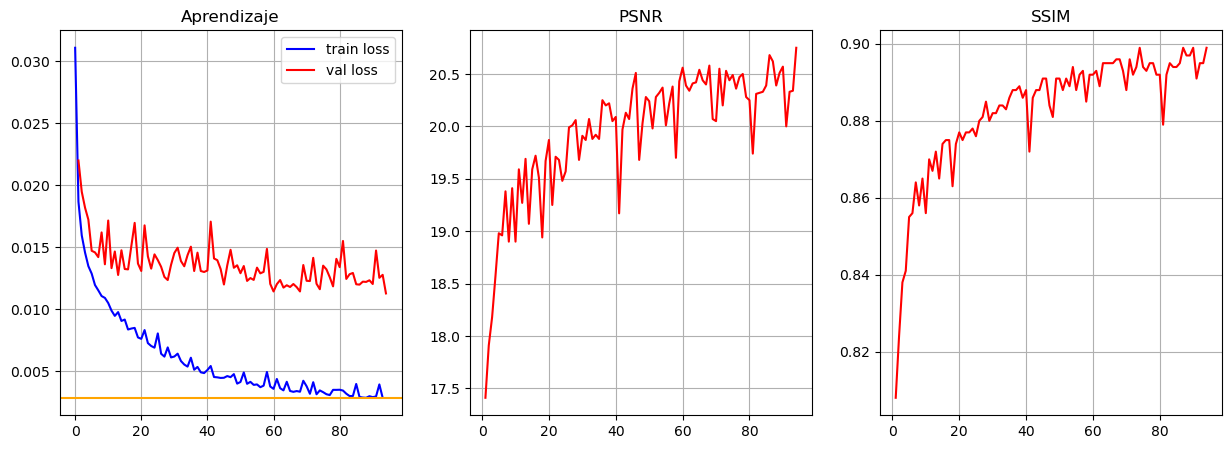

In [4]:

# logfile = '/home/emidan19/Desktop/train.log'
logfile = './train.log'

# logfile = '/home/emidan19/Desktop/deep-tempest/drunet/baseline/real_imag_chs_capture/drunet_retrain/patch_128/train_775_images/l1/train.log'
# logfile = '/home/emidan19/Desktop/deep-tempest/drunet/baseline/real_imag_chs_capture/drunet_retrain/patch_128/train_775_images/l2/train.log'

# Logs de entrenamiento con red inicializada
# logfile = '/home/emidan19/Desktop/deep-tempest/drunet/baseline/real_imag_chs_capture/drunet_from_scratch/l1/patches_64/train.log'
# logfile = '/home/emidan19/Desktop/deep-tempest/drunet/baseline/real_imag_chs_capture/drunet_from_scratch/l1/patches_128/train.log'

### Entrenada con toda la imagen
# logfile = '/home/emidan19/Desktop/deep-tempest/drunet/baseline/real_imag_chs_capture/drunet_retrain/patch_64/all_image/train.log'
# logfile = '/home/emidan19/Desktop/deep-tempest/drunet/baseline/real_imag_chs_capture/drunet_retrain/patch_128/all_image/train.log'

### Entrenando sólo con texto (quitando de la image patches naturales)
# logfile = '/home/emidan19/Desktop/deep-tempest/drunet/baseline/real_imag_chs_capture/drunet_retrain/patch_64/text_only/train.log'
# logfile = '/home/emidan19/Desktop/deep-tempest/drunet/baseline/real_imag_chs_capture/drunet_retrain/patch_128/text_only/train.log'

### Entrenada con todo un dataset de webpages (quitando de la image patches naturales)
# logfile = '/home/emidan19/Desktop/deep-tempest/drunet/baseline/real_imag_chs_capture/drunet_retrain/patch_128/train_775_images/train.log'

### Entrenada sólo con imagen natural
# logfile = '/home/emidan19/Desktop/deep-tempest/drunet/baseline/real_imag_chs_capture/drunet_retrain/patch_128/natural_image/train.log'

train_info, val_info = read_train_log (logfile)

# Get learning rates
lr_plot = filter_impulses(train_info['lr'])[:-1]

lr_aux = lr_plot[0]
dash_lim = np.max(train_info['loss'])

psnr_val = val_info['PSNR']
ssim_val = val_info['SSIM']
val_epochs = np.arange(len(train_info['loss'])//len(psnr_val),len(train_info['loss'])+1,len(train_info['loss'])//len(psnr_val))
loss_val = val_info['loss']

fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(15, 5))
ax[0].set_title('Aprendizaje')
ax[0].plot(train_info['loss'], 'b', label='train loss')
ax[0].plot(val_epochs, val_info['loss'],'r', label='val loss')
ax[0].axhline(y=np.min(train_info['loss']), color='orange', linestyle='-')
ax[0].grid()
ax[0].legend()

text_level = np.mean(train_info['loss'])

# for i, lr in enumerate(lr_plot):
#     if lr != lr_aux:
#         ax[0].plot([i,i],[0,dash_lim],'--k')
#         ax[0].text(i+10, text_level,'lr={:<.3e}'.format(lr), fontsize=7)

#         if lr_aux == lr_plot[0]:
#             ax[0].text(0, 0.1,'lr = {:<.3e}'.format(lr_aux), fontsize=7)
        
#         lr_aux = lr

# ax[0].set_ylim(0,1)

# plt.figure()
ax[1].set_title('PSNR')
ax[1].plot(val_epochs,psnr_val,'r')

ax[1].grid()
# ax[1].legend()

ax[2].set_title('SSIM')
ax[2].plot(val_epochs,ssim_val,'r')
ax[2].grid()
# ax[2].legend()

plt.show()

In [5]:
logfile = '/home/emidan19/Desktop/deep-tempest/drunet/baseline/real_imag_chs_capture/drunet_retrain/patch_128/train_775_images/l2/train.log'

train_info, val_info = read_train_log (logfile)

# Get learning rates
lr_plot = filter_impulses(train_info['lr'])[:-1]

lr_aux = lr_plot[0]
dash_lim = np.max(train_info['loss'])

psnr_val = val_info['PSNR']
val_epochs = np.arange(len(train_info['loss'])//len(psnr_val),len(train_info['loss'])+1,len(train_info['loss'])//len(psnr_val))
loss_val = val_info['loss']

fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(10, 5))
ax[0].set_title('Aprendizaje')
ax[0].plot(train_info['loss'], 'b', label='train loss')
ax[0].plot(val_epochs, val_info['loss'],'*-r', label='val loss')
ax[0].axhline(y=np.min(train_info['loss']), color='orange', linestyle='-')
ax[0].grid()
ax[0].legend()

text_level = np.mean(train_info['loss'])

for i, lr in enumerate(lr_plot):
    if lr != lr_aux:
        ax[0].plot([i,i],[0,dash_lim],'--k')
        ax[0].text(i+10, text_level,'lr={:<.3e}'.format(lr), fontsize=7)

        if lr_aux == lr_plot[0]:
            ax[0].text(0, 0.1,'lr = {:<.3e}'.format(lr_aux), fontsize=7)
        
        lr_aux = lr

# ax[0].set_ylim(0,1)

# plt.figure()
ax[1].set_title('PSNR')
ax[1].plot(val_epochs,psnr_val)

ax[1].grid()
ax[1].legend()

# plt.grid()
# plt.legend()
plt.show()

IndexError: list index out of range

In [ ]:
logfile = '/home/emidan19/Desktop/train.log'

# logfile = '/home/emidan19/Desktop/train_logs_tests/train_baby_100patches.log'
# logfile = '/home/emidan19/Desktop/train_logs_tests/train_baby_16patches.log'
# logfile = '/home/emidan19/Desktop/train_logs_tests/train_ifuhadto_100patches.log'

# Logs de entrenamiento con red inicializada
# logfile = '/home/emidan19/Desktop/deep-tempest/drunet/baseline/real_imag_chs_capture/drunet_from_scratch/l1/patches_64/train.log'
# logfile = '/home/emidan19/Desktop/deep-tempest/drunet/baseline/real_imag_chs_capture/drunet_from_scratch/l1/patches_128/train.log'

### Entrenada con toda la imagen
# logfile = '/home/emidan19/Desktop/deep-tempest/drunet/baseline/real_imag_chs_capture/drunet_retrain/patch_64/all_image/train.log'
# logfile = '/home/emidan19/Desktop/deep-tempest/drunet/baseline/real_imag_chs_capture/drunet_retrain/patch_128/all_image/train.log'

### Entrenando sólo con texto (quitando de la image patches naturales)
# logfile = '/home/emidan19/Desktop/deep-tempest/drunet/baseline/real_imag_chs_capture/drunet_retrain/patch_64/text_only/train.log'
# logfile = '/home/emidan19/Desktop/deep-tempest/drunet/baseline/real_imag_chs_capture/drunet_retrain/patch_128/text_only/train.log'

### Entrenada con todo un dataset de webpages (quitando de la image patches naturales)
# logfile = '/home/emidan19/Desktop/deep-tempest/drunet/baseline/real_imag_chs_capture/drunet_retrain/patch_128/train_775_images/train.log'

### Entrenada sólo con imagen natural
# logfile = '/home/emidan19/Desktop/deep-tempest/drunet/baseline/real_imag_chs_capture/drunet_retrain/patch_128/natural_image/train.log'

train_info, val_info = read_train_log (logfile)

# Get learning rates
lr_plot = filter_impulses(train_info['lr'])[:-1]

lr_aux = lr_plot[0]
dash_lim = np.max(train_info['loss'])

psnr_val = val_info['PSNR']
val_epochs = np.arange(len(train_info['loss'])//len(psnr_val),len(train_info['loss'])+1,len(train_info['loss'])//len(psnr_val))
loss_val = val_info['loss']

fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(10, 5))
ax[0].set_title('Aprendizaje')
ax[0].plot(train_info['loss'], 'b', label='train loss')
ax[0].plot(val_epochs, val_info['loss'],'r', label='val loss')
ax[0].axhline(y=np.min(train_info['loss']), color='orange', linestyle='-')
ax[0].grid()
ax[0].legend()

text_level = np.mean(train_info['loss'])

for i, lr in enumerate(lr_plot):
    if lr != lr_aux:
        ax[0].plot([i,i],[0,dash_lim],'--k')
        ax[0].text(i+10, text_level,'lr={:<.3e}'.format(lr), fontsize=7)

        if lr_aux == lr_plot[0]:
            ax[0].text(0, 0.1,'lr = {:<.3e}'.format(lr_aux), fontsize=7)
        
        lr_aux = lr

# ax[0].set_ylim(0,1)

# plt.figure()
ax[1].set_title('PSNR (test)')
ax[1].plot(val_epochs,psnr_val)

ax[1].grid()
ax[1].legend()

# plt.grid()
# plt.legend()
plt.show()

IndexError: list index out of range

# Optuna logfile read

In [7]:
def read_optuna_log (log_file):
    """ 
    Reads log file and retrieves optuna trials information.

    Args:
    - log_file (str): path to the log file containing the optuna information.

    Returns:

    """

    # Initialize lists for train
    trials = []

    on_trial_state = 0

    # Read log file
    with open(log_file, 'r') as file:

        for line in file:

            if 'metric:' in line:
                metric_str = line.split('metric:')[1].strip()


            if 'with parameters' in line:
                on_trial_state = 1
                trial_info =   {'train_metric':[], 'train_loss':[],
                            'val_metric':[], 'val_loss':[]}
                continue
            
            if ('training completed in' in line) or ('pruned' in line):
                on_trial_state = 0
                trials.append(trial_info)
                continue
            
            if on_trial_state:
                if 'lr =' in line:
                    trial_info['lr'] = float(line.split('= ')[1].strip())
                if 'tv_weight =' in line:
                    trial_info['tv_weight'] = float(line.split('= ')[1].strip())
                if 'train loss' in line:
                    str = line.split('\ntrain loss:')[0].split('train loss:')[1].split(',')[0].strip()

                    trial_info['train_loss'].append(float(str))

                if 'val loss' in line:
                    str = line.split('\nval loss:')[0].split('val loss:')[1].split(',')[0].strip()
                    # trial_info['val_loss'].append(float(line.split('val loss:')[1].split[','][0].strip()))
                    trial_info['val_loss'].append(float(str))
                if ('train '+metric_str) in line:
                    trial_info['train_metric'].append(float(line.split('train '+metric_str+':')[1].strip()))
                if ('val '+metric_str) in line:
                    trial_info['val_metric'].append(float(line.split('val '+metric_str+':')[1].strip()))

            if 'params={' in line:
                best_lr = float(line.split('\'lr\':')[1].split(',')[0].strip())
                best_tvwheight = float(line.split('\'tv_weight\':')[1].split('}')[0].strip())
                best_params = {'lr':best_lr, 'tv_weight':best_tvwheight}
                break
            else:
                best_params = None
                

    return trials, best_params, metric_str

In [26]:
trials, params, metric = read_optuna_log('/home/emidan19/Desktop/deep-tempest/drunet/baseline/optuna/optuna_hparams.log')

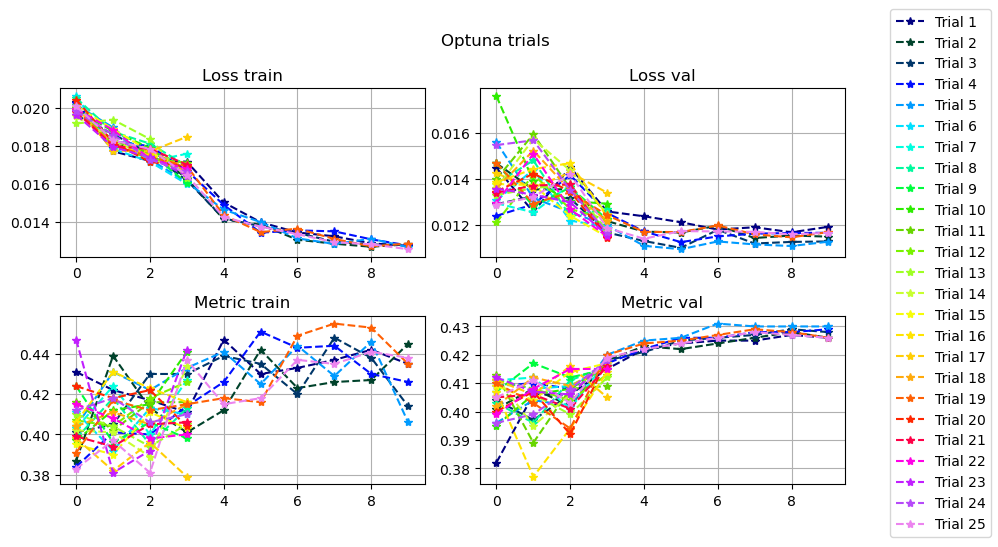

In [27]:

colormap = plt.cm.gist_ncar #nipy_spectral, Set1,Paired   
colors = [colormap(i) for i in np.linspace(0, 0.9,len(trials))]
# plt.figure()
# for i,trial in enumerate(trials):
#     plt.plot(trial['train_metric'],label = f'Trial {i+1}', color=colors[i])
# plt.legend()
# plt.grid()
# plt.show()

fig, ax = plt.subplots(nrows=2, ncols=2, figsize=(10, 5))
plt.suptitle('Optuna trials')
for i,trial in enumerate(trials):
    ax[0,0].set_title('Loss train')
    ax[0,0].plot(trial['train_loss'],'--*', color=colors[i])
    ax[0,0].grid()

    ax[0,1].set_title('Loss val')
    ax[0,1].plot(trial['val_loss'],'--*', color=colors[i])
    ax[0,1].grid()          

    ax[1,0].set_title('Metric train')
    ax[1,0].plot(trial['train_metric'],'--*', color=colors[i])
    ax[1,0].grid()

    ax[1,1].set_title('Metric val')
    ax[1,1].plot(trial['val_metric'],'--*',label = f'Trial {i+1}', color=colors[i])
    ax[1,1].grid()

fig.legend(loc=7)
fig.tight_layout()
fig.subplots_adjust(right=0.85)
plt.show()

In [28]:
[trials[i]['lr'] for i in range(len(trials))]

[2.6533377362239036e-06,
 0.0002520062339855879,
 0.03743393665687413,
 0.01658549132535369,
 0.0011844491293508258,
 0.0006633901318599708,
 5.189487613293542e-06,
 0.002426753819163594,
 2.3992742074885773e-05,
 3.820359391870575e-06,
 9.525727972418805e-05,
 0.08894497664315971,
 0.0033442614711111725,
 0.03400998413994269,
 0.00785616596228237,
 0.07379018012871992,
 0.0012185570133413535,
 0.007068778025457067,
 0.020050367660658056,
 0.0006656471296865696,
 0.0022559104553210203,
 0.016145903107215195,
 0.02522319501904527,
 0.005194234662525907,
 0.010627353800727782]